### Project - California Housing Price Prediction

In [ ]:
# Data Dictionary – Variable and Description
# longitude (signed numeric - float) : Longitude value for the block in California, USA
# latitude (numeric - float ) : Latitude value for the block in California, USA
# housing_median_age (numeric - int ) : Median age of the house in the block
# total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
# total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block
# population (numeric - int ) : Count of the total number of population in the block
# households (numeric - int ) : Count of the total number of households in the block
# median_income (numeric - float ) : Median of the total household income of all the houses in the block
# ocean_proximity (numeric - categorical ) : Type of the landscape of the block
# [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
# median_house_value (numeric - int ) : Median of the household prices of all the houses in the block


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',210)

In [2]:
dataSet=pd.read_csv(r'D:\SarojOfficeWork\AI\AI-From-Simplilearn\Modeule-2MachineLearning\ProjectforSubmission\CaliforniaHousingPricePrediction\housing.csv')

### Perform EDA

In [ ]:
# EDA step-1 Check for null values
# EDA step-2 Check for duplicate values

In [4]:
dataSet.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [6]:
#Check for NULL values
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [81]:
# total_bedrooms has 207 null values
dataSet[dataSet.total_bedrooms.isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                  47         1256             NaN   
341      -122.17     37.75                  38          992             NaN   
538      -122.28     37.78                  29         5154             NaN   
563      -122.24     37.75                  45          891             NaN   
696      -122.10     37.69                  41          746             NaN   
738      -122.14     37.67                  37         3342             NaN   
1097     -121.77     39.66                  20         3759             NaN   
1350     -121.95     38.03                   5         5526             NaN   
1456     -121.98     37.96                  22         2987             NaN   
1493     -122.01     37.94                  23         3741             NaN   
1606     -122.08     37.88                  26         2947             NaN   
2028     -119.75     36.71                  38         1481             NaN   
2115     -119.72     36.76                  23         6403             NaN   
2301     -119.78     36.82                  25         5016             NaN   
2323     -119.73     36.83                   8         3602             NaN   
2334     -119.69     36.83                  32         1098             NaN   
2351     -119.68     36.79                  16         1551             NaN   
2412     -119.45     36.61                  24         1302             NaN   
2420     -119.44     36.58                  37         1054             NaN   
2578     -124.06     40.86                  34         4183             NaN   
2608     -124.00     40.92                  29         1429             NaN   
2647     -124.13     40.55                  38          544             NaN   
2826     -119.11     35.42                  52          154             NaN   
3024     -119.46     35.14                  30         2943             NaN   
3328     -122.72     38.88                  29         2781             NaN   
3354     -120.67     40.50                  15         5343             NaN   
3376     -118.28     34.25                  29         2559             NaN   
3482     -118.45     34.30                  27         2676             NaN   
3485     -118.55     34.28                  16         8879             NaN   
3529     -118.53     34.26                  18         3674             NaN   
3721     -118.43     34.20                  28         3386             NaN   
3778     -118.40     34.17                  24         6347             NaN   
3912     -118.55     34.19                  18         5862             NaN   
3921     -118.56     34.20                  35         2273             NaN   
3958     -118.59     34.20                  21         1789             NaN   
4043     -118.50     34.17                  37          880             NaN   
4046     -118.49     34.13                  24         4394             NaN   
4186     -118.23     34.13                  48         1308             NaN   
4279     -118.31     34.09                  37          773             NaN   
4309     -118.32     34.09                  44         2666             NaN   
4391     -118.27     34.07                  27         1190             NaN   
4447     -118.21     34.07                  52         1770             NaN   
4496     -118.22     34.05                  34         1113             NaN   
4591     -118.28     34.06                  42         2472             NaN   
4600     -118.27     34.04                  13         1784             NaN   
4629     -118.30     34.07                  18         3759             NaN   
4667     -118.29     34.05                  34         1102             NaN   
4691     -118.37     34.07                  50         2519             NaN   
4738     -118.38     34.05                  49          702             NaN   
4743     -118.36     34.05                  42         13

In [3]:
# Lets analyze how total_bedrooms are distributed acorss ocean_proximity
dataSet[['ocean_proximity','total_bedrooms']].groupby('ocean_proximity').mean().round()

total_bedrooms
ocean_proximity                
<1H OCEAN                 547.0
INLAND                    534.0
ISLAND                    420.0
NEAR BAY                  514.0
NEAR OCEAN                539.0

In [4]:
# lets fillin the NA value of total_bedrooms corresponding mean value of ocean_proximity
for i in np.arange(len(dataSet)):
    if (pd.isna(dataSet.loc[i,'total_bedrooms']) & (dataSet.loc[i,'ocean_proximity']=='<1H OCEAN')):
        dataSet.loc[i,'total_bedrooms']=547
    elif (pd.isna(dataSet.loc[i,'total_bedrooms']) & (dataSet.loc[i,'ocean_proximity']=='INLAND')):
        #print(dataSet.loc[i,'total_bedrooms'],dataSet.loc[i,'ocean_proximity'])
        dataSet.loc[i,'total_bedrooms']=534
    elif (pd.isna(dataSet.loc[i,'total_bedrooms']) & (dataSet.loc[i,'ocean_proximity']=='ISLAND')):
        dataSet.loc[i,'total_bedrooms']=420
    elif (pd.isna(dataSet.loc[i,'total_bedrooms']) & (dataSet.loc[i,'ocean_proximity']=='NEAR BAY')):
        dataSet.loc[i,'total_bedrooms']=514  
    elif (pd.isna(dataSet.loc[i,'total_bedrooms']) & (dataSet.loc[i,'ocean_proximity']=='NEAR OCEAN')):
        dataSet.loc[i,'total_bedrooms']=539
    

In [78]:
# lets fillin the NA value of total_bedrooms corresponding mean value of ocean_proximity
#dataSet.loc[(dataSet.total_bedrooms.isna()) & (dataSet.ocean_proximity=='INLAND')].fillna(534,inplace=True)

In [84]:
#Check for NULL values
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [87]:
# EDA step-2 Check for duplicate values
dataSet[dataSet.duplicated()]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity, median_house_value]
Index: []

In [89]:
# EDA step-3 Check for Outliers
dataSet.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.883866   1425.476744    499.539680       3.870671   
std        419.267792   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
sns.boxplot(dataSet.housing_median_age)

In [136]:
sns.boxplot(dataSet.median_house_value)

In [ ]:
columns=dataSet.columns
for X in columns:
    if (X !='ocean_proximity'):
        
        sns.boxenplot(dataSet[X])
        plt.show()


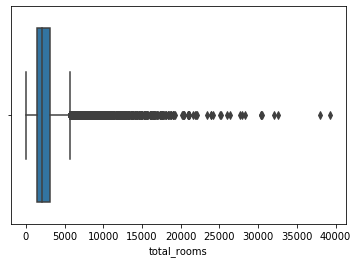

In [137]:
sns.boxplot(dataSet.total_rooms)


In [192]:
sns.distplot(dataSet.total_rooms,hist=False)

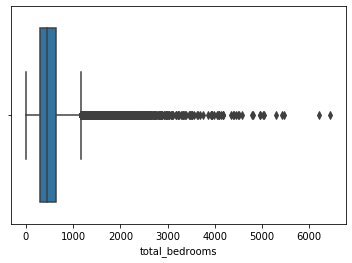

In [138]:
sns.boxplot(dataSet.total_bedrooms)

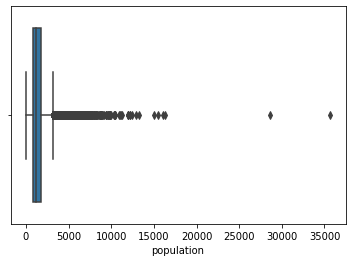

In [139]:
sns.boxplot(dataSet.population)

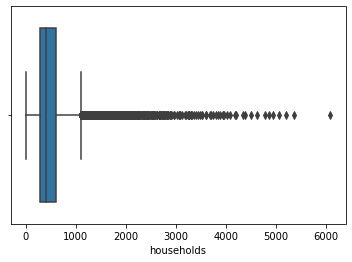

In [140]:
sns.boxplot(dataSet.households)

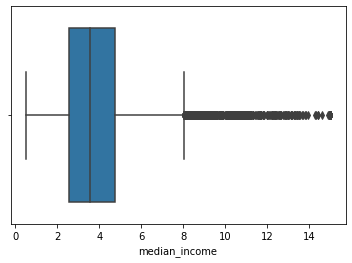

In [141]:
sns.boxplot(dataSet.median_income)

In [154]:
#Find outliers using IQR for total_rooms
Q1,Q2,Q3=np.percentile(dataSet.total_rooms,[25,50,75])
IQR=Q3-Q1
lowIQR=Q1-(1.5*IQR)
highIQR=Q3+1.5*IQR
dataSet[dataSet.total_rooms<lowIQR]
dataSet[dataSet.total_rooms>highIQR]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                  21         7099          1106.0   
101      -122.25     37.81                  28         5806          1603.0   
104      -122.26     37.81                  34         5871          1914.0   
185      -122.23     37.79                  43         5963          1344.0   
283      -122.16     37.79                  22        12842          2048.0   
...          ...       ...                 ...          ...             ...   
20543    -121.74     38.55                  33         6861          1820.0   
20544    -121.76     38.55                  23         8800          1857.0   
20563    -121.75     38.67                   9        12139          2640.0   
20567    -121.79     38.66                  15         6809          1052.0   
20629    -121.39     39.12                  28        10035          1856.0   

       population  households  median_income ocean_proximity  \
1            2401        1138         8.3014        NEAR BAY   
101          2563        1497         3.2177        NEAR BAY   
104          2689        1789         2.8406        NEAR BAY   
185          4367        1231         2.1917        NEAR BAY   
283          4985        1967         5.9849        NEAR BAY   
...           ...         ...            ...             ...   
20543        3717        1767         1.7311          INLAND   
20544        6330        1832         2.0650          INLAND   
20563        6837        2358         3.1250          INLAND   
20567        3060        1060         5.3064          INLAND   
20629        6912        1818         2.0943          INLAND   

       median_house_value  
1                  358500  
101                273400  
104                335700  
185                112800  
283                371000  
...                   ...  
20543              182600  
20544              219400  
20563              132500  
20567              165000  
20629              108300  

[1287 rows x 10 columns]

In [157]:
#Find outliers using IQR for total_bedrooms
Q1,Q2,Q3=np.percentile(dataSet.total_bedrooms,[25,50,75])
IQR=Q3-Q1
lowIQR=Q1-(1.5*IQR)
highIQR=Q3+1.5*IQR
dataSet[dataSet.total_bedrooms<lowIQR]
dataSet[dataSet.total_bedrooms>highIQR]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
95       -122.26     37.80                  36         5329          2477.0   
96       -122.26     37.82                  31         4596          1331.0   
98       -122.26     37.82                  22         3682          1270.0   
100      -122.25     37.81                  29         4656          1414.0   
101      -122.25     37.81                  28         5806          1603.0   
...          ...       ...                 ...          ...             ...   
20539    -121.71     38.56                  20         8627          1516.0   
20543    -121.74     38.55                  33         6861          1820.0   
20544    -121.76     38.55                  23         8800          1857.0   
20563    -121.75     38.67                   9        12139          2640.0   
20629    -121.39     39.12                  28        10035          1856.0   

       population  households  median_income ocean_proximity  \
95           3469        2323         2.0096        NEAR BAY   
96           2048        1180         2.8345        NEAR BAY   
98           2024        1250         1.2185        NEAR BAY   
100          2304        1250         2.4912        NEAR BAY   
101          2563        1497         3.2177        NEAR BAY   
...           ...         ...            ...             ...   
20539        4071        1466         4.2198          INLAND   
20543        3717        1767         1.7311          INLAND   
20544        6330        1832         2.0650          INLAND   
20563        6837        2358         3.1250          INLAND   
20629        6912        1818         2.0943          INLAND   

       median_house_value  
95                 130000  
96                 183800  
98                 170000  
100                257800  
101                273400  
...                   ...  
20539              164100  
20543              182600  
20544              219400  
20563              132500  
20629              108300  

[1306 rows x 10 columns]

In [158]:
#Find outliers using IQR for population
Q1,Q2,Q3=np.percentile(dataSet.population,[25,50,75])
IQR=Q3-Q1
lowIQR=Q1-(1.5*IQR)
highIQR=Q3+1.5*IQR
dataSet[dataSet.population<lowIQR]
dataSet[dataSet.population>highIQR]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
95       -122.26     37.80                  36         5329          2477.0   
185      -122.23     37.79                  43         5963          1344.0   
283      -122.16     37.79                  22        12842          2048.0   
460      -122.26     37.87                  52         1087           371.0   
485      -122.26     37.86                  35         5161          1744.0   
...          ...       ...                 ...          ...             ...   
20543    -121.74     38.55                  33         6861          1820.0   
20544    -121.76     38.55                  23         8800          1857.0   
20563    -121.75     38.67                   9        12139          2640.0   
20604    -121.54     39.12                  17         4251           899.0   
20629    -121.39     39.12                  28        10035          1856.0   

       population  households  median_income ocean_proximity  \
95           3469        2323         2.0096        NEAR BAY   
185          4367        1231         2.1917        NEAR BAY   
283          4985        1967         5.9849        NEAR BAY   
460          3337         350         1.4012        NEAR BAY   
485          3276        1742         1.6307        NEAR BAY   
...           ...         ...            ...             ...   
20543        3717        1767         1.7311          INLAND   
20544        6330        1832         2.0650          INLAND   
20563        6837        2358         3.1250          INLAND   
20604        3265         934         2.3496          INLAND   
20629        6912        1818         2.0943          INLAND   

       median_house_value  
95                 130000  
185                112800  
283                371000  
460                175000  
485                253600  
...                   ...  
20543              182600  
20544              219400  
20563              132500  
20604               65000  
20629              108300  

[1196 rows x 10 columns]

In [159]:
#Find outliers using IQR for households
Q1,Q2,Q3=np.percentile(dataSet.households,[25,50,75])
IQR=Q3-Q1
lowIQR=Q1-(1.5*IQR)
highIQR=Q3+1.5*IQR
dataSet[dataSet.households<lowIQR]
dataSet[dataSet.households>highIQR]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                  21         7099          1106.0   
95       -122.26     37.80                  36         5329          2477.0   
96       -122.26     37.82                  31         4596          1331.0   
98       -122.26     37.82                  22         3682          1270.0   
100      -122.25     37.81                  29         4656          1414.0   
...          ...       ...                 ...          ...             ...   
20541    -121.70     38.54                  13         6819          1158.0   
20543    -121.74     38.55                  33         6861          1820.0   
20544    -121.76     38.55                  23         8800          1857.0   
20563    -121.75     38.67                   9        12139          2640.0   
20629    -121.39     39.12                  28        10035          1856.0   

       population  households  median_income ocean_proximity  \
1            2401        1138         8.3014        NEAR BAY   
95           3469        2323         2.0096        NEAR BAY   
96           2048        1180         2.8345        NEAR BAY   
98           2024        1250         1.2185        NEAR BAY   
100          2304        1250         2.4912        NEAR BAY   
...           ...         ...            ...             ...   
20541        2828        1115         4.6225          INLAND   
20543        3717        1767         1.7311          INLAND   
20544        6330        1832         2.0650          INLAND   
20563        6837        2358         3.1250          INLAND   
20629        6912        1818         2.0943          INLAND   

       median_house_value  
1                  358500  
95                 130000  
96                 183800  
98                 170000  
100                257800  
...                   ...  
20541              226500  
20543              182600  
20544              219400  
20563              132500  
20629              108300  

[1220 rows x 10 columns]

In [160]:
#Find outliers using IQR for median_income
Q1,Q2,Q3=np.percentile(dataSet.median_income,[25,50,75])
IQR=Q3-Q1
lowIQR=Q1-(1.5*IQR)
highIQR=Q3+1.5*IQR
dataSet[dataSet.median_income<lowIQR]
dataSet[dataSet.median_income>highIQR]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
131      -122.19     37.84                  18         1617           210.0   
134      -122.19     37.83                  28         1326           184.0   
135      -122.20     37.83                  26         1589           223.0   
...          ...       ...                 ...          ...             ...   
20426    -118.69     34.18                  11         1177           138.0   
20427    -118.80     34.19                   4        15572          2222.0   
20428    -118.83     34.23                   6         8803          1114.0   
20436    -118.69     34.21                  10         3663           409.0   
20503    -118.75     34.33                  27          534            85.0   

       population  households  median_income ocean_proximity  \
0             322         126         8.3252        NEAR BAY   
1            2401        1138         8.3014        NEAR BAY   
131           533         194        11.6017        NEAR BAY   
134           463         190         8.2049        NEAR BAY   
135           542         211         8.4010        NEAR BAY   
...           ...         ...            ...             ...   
20426         415         119        10.0472       <1H OCEAN   
20427        5495        2152         8.6499       <1H OCEAN   
20428        3385        1010         8.7288       <1H OCEAN   
20436        1179         371        12.5420       <1H OCEAN   
20503         243          77         8.2787       <1H OCEAN   

       median_house_value  
0                  452600  
1                  358500  
131                392600  
134                335200  
135                351200  
...                   ...  
20426              500001  
20427              500001  
20428              425800  
20436              500001  
20503              330000  

[681 rows x 10 columns]

### Perform Data Preprocessing

In [165]:
# Encode categorical data
dataSet.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
dataSet.ocean_proximity.replace(['<1H OCEAN','NEAR OCEAN','NEAR BAY'],['HOCEAN','NEAROCEAN','NEARBAY'],inplace=True)

In [175]:
dataSet.ocean_proximity.value_counts()

HOCEAN       9136
INLAND       6551
NEAROCEAN    2658
NEARBAY      2290
ISLAND          5
Name: ocean_proximity, dtype: int64

In [ ]:
# Create Dummy variable
varDummy=pd.get_dummies(dataSet.ocean_proximity)
dataSet=pd.concat([varDummy,dataSet.drop(columns='ocean_proximity')],axis=1)

In [8]:
dataSet

HOCEAN  INLAND  ISLAND  NEARBAY  NEAROCEAN  longitude  latitude  \
0           0       0       0        1          0    -122.23     37.88   
1           0       0       0        1          0    -122.22     37.86   
2           0       0       0        1          0    -122.24     37.85   
3           0       0       0        1          0    -122.25     37.85   
4           0       0       0        1          0    -122.25     37.85   
...       ...     ...     ...      ...        ...        ...       ...   
20635       0       1       0        0          0    -121.09     39.48   
20636       0       1       0        0          0    -121.21     39.49   
20637       0       1       0        0          0    -121.22     39.43   
20638       0       1       0        0          0    -121.32     39.43   
20639       0       1       0        0          0    -121.24     39.37   

       housing_median_age  total_rooms  total_bedrooms  population  \
0                      41          880           129.0         322   
1                      21         7099          1106.0        2401   
2                      52         1467           190.0         496   
3                      52         1274           235.0         558   
4                      52         1627           280.0         565   
...                   ...          ...             ...         ...   
20635                  25         1665           374.0         845   
20636                  18          697           150.0         356   
20637                  17         2254           485.0        1007   
20638                  18         1860           409.0         741   
20639                  16         2785           616.0        1387   

       households  median_income  median_house_value  
0             126         8.3252              452600  
1            1138         8.3014              358500  
2             177         7.2574              352100  
3             219         5.6431              341300  
4             259         3.8462              342200  
...           ...            ...                 ...  
20635         330         1.5603               78100  
20636         114         2.5568               77100  
20637         433         1.7000               92300  
20638         349         1.8672               84700  
20639         530         2.3886               89400  

[20640 rows x 14 columns]

In [178]:
## Understand the Correlation/MultiColliniarity between variables
dataSet.corr()

HOCEAN    INLAND    ISLAND   NEARBAY  NEAROCEAN  \
HOCEAN              1.000000 -0.607669 -0.013872 -0.314813  -0.342620   
INLAND             -0.607669  1.000000 -0.010614 -0.240887  -0.262163   
ISLAND             -0.013872 -0.010614  1.000000 -0.005499  -0.005985   
NEARBAY            -0.314813 -0.240887 -0.005499  1.000000  -0.135818   
NEAROCEAN          -0.342620 -0.262163 -0.005985 -0.135818   1.000000   
longitude           0.321121 -0.055575  0.009446 -0.474489   0.045509   
latitude           -0.446969  0.351166 -0.016572  0.358771  -0.160818   
housing_median_age  0.045300 -0.236645  0.017020  0.255172   0.021622   
total_rooms        -0.003031  0.025624 -0.007572 -0.023022  -0.009175   
total_bedrooms      0.018408 -0.006508 -0.004362 -0.019972   0.000675   
population          0.074613 -0.020732 -0.010412 -0.060880  -0.024264   
households          0.042435 -0.039402 -0.009077 -0.010093   0.001714   
median_income       0.168876 -0.237496 -0.009228  0.056197   0.027344   
median_house_value  0.256617 -0.484859  0.023416  0.160284   0.141862   

                    longitude  latitude  housing_median_age  total_rooms  \
HOCEAN               0.321121 -0.446969            0.045300    -0.003031   
INLAND              -0.055575  0.351166           -0.236645     0.025624   
ISLAND               0.009446 -0.016572            0.017020    -0.007572   
NEARBAY             -0.474489  0.358771            0.255172    -0.023022   
NEAROCEAN            0.045509 -0.160818            0.021622    -0.009175   
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069377 -0.066782           -0.319010     0.927252   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
HOCEAN                    0.018408    0.074613    0.042435       0.168876   
INLAND                   -0.006508   -0.020732   -0.039402      -0.237496   
ISLAND                   -0.004362   -0.010412   -0.009077      -0.009228   
NEARBAY                  -0.019972   -0.060880   -0.010093       0.056197   
NEAROCEAN                 0.000675   -0.024264    0.001714       0.027344   
longitude                 0.069377    0.099773    0.055310      -0.015176   
latitude                 -0.066782   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.319010   -0.296244   -0.302916      -0.119034   
total_rooms               0.927252    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.873931    0.974720      -0.007652   
population                0.873931    1.000000    0.907222       0.004834   
households                0.974720    0.907222    1.000000       0.013033   
median_income            -0.007652    0.004834    0.013033       1.000000   
median_house_value        0.049470   -0.024650    0.065843       0.688075   

                    median_house_value  
HOCEAN                        0.256617  
INLAND                       -0.484859  
ISLAND                        0.023416  
NEARBAY                       0.160284  
NEAROCEAN                     0.141862  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049470  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [244]:
# extract features and label
features= dataSet.drop(columns='median_house_value').values
label=dataSet.loc[:,['median_house_value']].values

## Perform standrd scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
finalFeatures=sc.fit_transform(features)

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [214]:
for i in np.arange(1,50):
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    modelLR=LinearRegression()
    modelLR.fit(X_train,y_train)
    train_score=modelLR.score(X_train,y_train)
    test_score=modelLR.score(X_test,y_test)
    #if test_score>0.67:
    if test_score > train_score:
        print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,i))

train Score is: 0.643509394124093 and Test_Score is:0.6531348006590949 for Random_state: 3
train Score is: 0.6439672957471378 and Test_Score is:0.6507172377629191 for Random_state: 5
train Score is: 0.6430089199643365 and Test_Score is:0.6547519622657265 for Random_state: 8
train Score is: 0.6450022324676341 and Test_Score is:0.6464430697595768 for Random_state: 10
train Score is: 0.6445859296715853 and Test_Score is:0.6479277069741844 for Random_state: 11
train Score is: 0.6449227233294624 and Test_Score is:0.6472014288339908 for Random_state: 13
train Score is: 0.6439525913900878 and Test_Score is:0.6513044240377296 for Random_state: 22
train Score is: 0.6419695008313703 and Test_Score is:0.6586076361356102 for Random_state: 23
train Score is: 0.6423443968223054 and Test_Score is:0.6576631190397368 for Random_state: 24
train Score is: 0.6447951243588854 and Test_Score is:0.6474822148719428 for Random_state: 25
train Score is: 0.6438329183490628 and Test_Score is:0.6517682579135815 fo

### Linear Regression

In [215]:
    i=28
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    modelLR=LinearRegression()
    modelLR.fit(X_train,y_train)
    train_score=modelLR.score(X_train,y_train)
    test_score=modelLR.score(X_test,y_test)
    print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,i))

train Score is: 0.6400422925953944 and Test_Score is:0.6655783254456731 for Random_state: 28


In [216]:
modelLR.predict(X_test)

array([[147247.43195995],
       [136760.74445995],
       [144764.05695995],
       ...,
       [307872.11945995],
       [276972.93195995],
       [183311.86945995]])

In [219]:
#Print root mean squared error (RMSE) from Linear Regression
mse=mean_squared_error(y_true=y_test,y_pred=modelLR.predict(X_test))
RMSE=np.sqrt(mse)
RMSE

67614.4906246694

### DecesionTree Regression

In [222]:
from sklearn.tree import DecisionTreeRegressor
for i in np.arange(1,50):
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    modelDTR=DecisionTreeRegressor()
    modelDTR.fit(X_train,y_train)
    train_score=modelDTR.score(X_train,y_train)
    test_score=modelDTR.score(X_test,y_test)
    #if test_score>0.67:
    #if test_score > train_score:
    print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,i))

train Score is: 1.0 and Test_Score is:0.6168661074283055 for Random_state: 1
train Score is: 1.0 and Test_Score is:0.6551380254518708 for Random_state: 2
train Score is: 1.0 and Test_Score is:0.6685828245758407 for Random_state: 3
train Score is: 1.0 and Test_Score is:0.6419688840978176 for Random_state: 4
train Score is: 1.0 and Test_Score is:0.6920944166296736 for Random_state: 5
train Score is: 1.0 and Test_Score is:0.6336269600944051 for Random_state: 6
train Score is: 1.0 and Test_Score is:0.6331539671394615 for Random_state: 7
train Score is: 1.0 and Test_Score is:0.678929192243669 for Random_state: 8
train Score is: 1.0 and Test_Score is:0.6521850366084847 for Random_state: 9
train Score is: 1.0 and Test_Score is:0.6688686707311902 for Random_state: 10
train Score is: 1.0 and Test_Score is:0.649901805297389 for Random_state: 11
train Score is: 1.0 and Test_Score is:0.6602450316769001 for Random_state: 12
train Score is: 1.0 and Test_Score is:0.6044001329417495 for Random_state: 

In [224]:
RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=modelDTR.predict(X_test)))
RMSE

67551.48901943416

### RandomForest Regression

In [236]:
import warnings
warnings.filterwarnings(action='ignore')

TypeError: 'bool' object is not callable

In [237]:

from sklearn.ensemble import RandomForestRegressor

for i in np.arange(1,2):
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    modelRFR=RandomForestRegressor()
    modelRFR.fit(X_train,y_train)
    train_score=modelRFR.score(X_train,y_train)
    test_score=modelRFR.score(X_test,y_test)
    #if test_score>0.67:
    #if test_score > train_score:
    print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,i))

C:\Users\Aparna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aparna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


train Score is: 0.9643994586104785 and Test_Score is:0.7970264621111997 for Random_state: 1


### Lets apply Feature selection Method: 

In [28]:

# extract features and label
features= dataSet.drop(columns='median_house_value').values
label=dataSet.loc[:,['median_house_value']].values

### Select features using Backward Feature elimination Technique(OLS)

In [10]:

from statsmodels.formula.api import ols

In [22]:
label_column='median_house_value'
feature_columns='+'.join(dataSet.drop(columns='median_house_value').columns)
feature_columns

'HOCEAN + INLAND + ISLAND + NEARBAY + NEAROCEAN + longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income'

In [23]:
model=ols(label_column+'~'+feature_columns,data=dataSet)
LR=model.fit()

In [24]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3130.
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        23:18:07   Log-Likelihood:            -2.5917e+05
No. Observations:               20640   AIC:                         5.184e+05
Df Residuals:                   20627   BIC:                         5.185e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.843e+06   7.32e+04    -25.193      0.000   -1.99e+06    -1.7e+06
HOCEAN             -3.922e+05   1.54e+04    -25.470      0.000   -4.22e+05   -3.62e+05
INLAND             -4.319e+05   1.45e+04    -29.875      0.000    -4.6e+05   -4.04e+05
ISLAND             -2.361e+05   2.98e+04     -7.918      0.000   -2.95e+05   -1.78e+05
NEARBAY            -3.959e+05   1.58e+04    -24.982      0.000   -4.27e+05   -3.65e+05
NEAROCEAN          -3.874e+05   1.57e+04    -24.601      0.000   -4.18e+05   -3.57e+05
longitude          -2.646e+04   1014.047    -26.091      0.000   -2.84e+04   -2.45e+04
latitude            -2.52e+04    999.918    -25.199      0.000   -2.72e+04   -2.32e+04
housing_median_age  1057.7911     43.704     24.203      0.000     972.127    1143.455
total_rooms           -4.7685      0.772     -6.181      0.000      -6.281      -3.256
total_bedrooms        72.2103      5.983     12.069      0.000      60.483      83.938
population           -39.2672      1.064    -36.903      0.000     -41.353     -37.181
households            77.0186      6.695     11.504      0.000      63.896      90.141
median_income       3.877e+04    332.440    116.633      0.000    3.81e+04    3.94e+04
==============================================================================
Omnibus:                     5176.215   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19755.140
Skew:                           1.213   Prob(JB):                         0.00
Kurtosis:                       7.134   Cond. No.                     3.07e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Select features using select by model

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
modelLR=LinearRegression()

In [31]:
model=SelectFromModel(estimator=modelLR)
model.fit(features,label)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [32]:
print(dataSet.columns)
print(model.get_support())

Index(['HOCEAN', 'INLAND', 'ISLAND', 'NEARBAY', 'NEAROCEAN', 'longitude',
       'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')
[False  True  True False False False False False False False False False
  True]


In [46]:
#Select by model says the relevent features are INLAND , ISLAND and median_income. 
# we can try fitting the model with only these features and see the score
finalFeatures=dataSet.loc[:,['INLAND','ISLAND','median_income']].values

## Perform standrd scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
finalFeatures=sc.fit_transform(finalFeatures)


i=28
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
modelLR=LinearRegression()
modelLR.fit(X_train,y_train)
train_score=modelLR.score(X_train,y_train)
test_score=modelLR.score(X_test,y_test)
print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,i))


train Score is: 0.5807529436194767 and Test_Score is:0.5940907610158109 for Random_state: 28


In [53]:
### Select features using recursive feature elimination technique
from sklearn.feature_selection import RFE
model_RFE=RFE(estimator=modelLR)
model_RFE.fit(features,label)
print(dataSet.columns)
print(model_RFE.ranking_)
print(model_RFE.support_)

Index(['HOCEAN', 'INLAND', 'ISLAND', 'NEARBAY', 'NEAROCEAN', 'longitude',
       'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')
[1 1 1 1 1 2 3 4 8 5 7 6 1]
[ True  True  True  True  True False False False False False False False
  True]


C:\Users\Aparna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
# with RFE, the best features are  'HOCEAN', 'INLAND', 'ISLAND', 'NEARBAY', 'NEAROCEAN' and 'median_income'
# we can try fitting the model with only these features and see the score
finalFeatures=dataSet.loc[:,['HOCEAN','INLAND','ISLAND','NEARBAY', 'NEAROCEAN','median_income']].values
## Perform standrd scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
finalFeatures=sc.fit_transform(finalFeatures)


i=28
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
modelLR=LinearRegression()
modelLR.fit(X_train,y_train)
train_score=modelLR.score(X_train,y_train)
test_score=modelLR.score(X_test,y_test)
print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,i))

train Score is: 0.5847031532355227 and Test_Score is:0.6002671159749576 for Random_state: 28


In [65]:
# Feature selection usng ANOVA
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

model_ANOVA=SelectPercentile(percentile=50,score_func=f_regression)
model_ANOVA.fit(features,label)
print(dataSet.columns)
print(model_ANOVA.get_support())
print(model_ANOVA.pvalues_)

Index(['HOCEAN', 'INLAND', 'ISLAND', 'NEARBAY', 'NEAROCEAN', 'longitude',
       'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')
[ True  True False  True  True False  True False False False False False
  True]
[1.13120967e-307 0.00000000e+000 7.67219236e-004 7.93921675e-119
 3.03743656e-093 3.92332207e-011 2.93985929e-096 2.76186068e-052
 1.68938456e-083 1.15099402e-012 3.97630785e-004 2.82342065e-021
 0.00000000e+000]


C:\Users\Aparna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
# From ANOVA, the best features are 'HOCEAN','INLAND','NEARBAY','NEAROCEAN' and 'median_income'
# we can try fitting the model with only these features and see the score
finalFeatures=dataSet.loc[:,['HOCEAN','INLAND','NEARBAY', 'NEAROCEAN','median_income']].values
## Perform standrd scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
finalFeatures=sc.fit_transform(finalFeatures)


i=28
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
modelLR=LinearRegression()
modelLR.fit(X_train,y_train)
train_score=modelLR.score(X_train,y_train)
test_score=modelLR.score(X_test,y_test)
print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,i))

train Score is: 0.5847036248494173 and Test_Score is:0.6002853374662269 for Random_state: 28


### Conclusion So Far

In [67]:
# None of the feature selection approach has improved the original score of train Score is: 0.64 and Test_Score is:0.66

In [71]:
# Perform Linear Regression with just one independent variable(median_income)

finalFeatures=dataSet.loc[:,['median_income']].values
label=dataSet.loc[:,['median_house_value']].values
## Perform standrd scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
finalFeatures=sc.fit_transform(finalFeatures)


i=28
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=28)
modelLR=LinearRegression()
modelLR.fit(X_train,y_train)
train_score=modelLR.score(X_train,y_train)
test_score=modelLR.score(X_test,y_test)
print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,i))

train Score is: 0.4682152161084773 and Test_Score is:0.4931557459502369 for Random_state: 28


### Support vector machine

In [75]:


# extract features and label
features= dataSet.drop(columns='median_house_value').values
label=dataSet.loc[:,'median_house_value'].values

## Perform standrd scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
finalFeatures=sc.fit_transform(features)


from sklearn.svm import SVR
modelSVR=SVR()
modelSVR.fit(finalFeatures,label)

X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=28)
modelSVR=LinearRegression()
modelSVR.fit(X_train,y_train)
train_score=modelSVR.score(X_train,y_train)
test_score=modelSVR.score(X_test,y_test)
print('train Score is: {} and Test_Score is:{} for Random_state: {}'.format(train_score,test_score,2))

train Score is: 0.6400422925953944 and Test_Score is:0.6655783254456731 for Random_state: 2


In [ ]:
### Conclusion So Far!!!
### Feature selection approach has has not helped in improving the original score 
# 1. Linear regression train Score : 0.64 and Test_Score :0.66. for Random_state: 28
# 2. Decesion TreeRegressor train Score is: 1.0 and Test_Score is:0.69 for Random_state: 5
# 3. Random ForestRegressor train Score is: 0.96 and Test_Score is:0.79 for Random_state: 1
# 4. Support Vector Regressor train Score is: 0.64 and Test_Score is:0.66 for Random_state: 2
#----------------------------------------------------------------
# Model                     Train_Score        Test Score        Random State 
# Linear regression           64%                66%               28
# Decesion TreeRegressor      100%               69%               5
# Random ForestRegressor      96%                79%               1
# Support Vector Regressor    64%                66%               2
#